# Banagalore House Price Prediction

In [1]:
%ls

 Volume in drive E is Project
 Volume Serial Number is 42B3-187E

 Directory of E:\Price Prediction webapp\model

06/18/2020  10:50 AM    <DIR>          .
06/18/2020  10:50 AM    <DIR>          ..
06/18/2020  10:34 AM    <DIR>          .ipynb_checkpoints
06/18/2020  10:46 AM             4,430 banglore_home_prices_model.pickle
06/16/2020  10:00 AM           938,020 bengaluru_house_prices.csv
06/18/2020  10:50 AM           489,479 Build a regression model.ipynb
06/18/2020  10:46 AM             3,994 columns.json
06/18/2020  10:48 AM             9,808 ModelTest.ipynb
06/18/2020  10:46 AM         3,690,359 prepared_data.csv
               6 File(s)      5,136,090 bytes
               3 Dir(s)  62,739,120,128 bytes free


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Some basic settings
#---------Pandas-------------#
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)
#--------matplotlib----------#
plt.rcParams['figure.figsize']=(20,10)

In [4]:
df=pd.read_csv('./bengaluru_house_prices.csv')
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
bath,13247.0,2.692610,1.341458,1.0,2.0,2.0,3.0,40.0
balcony,12711.0,1.584376,0.817263,0.0,1.0,2.0,2.0,3.0
price,13320.0,112.565627,148.971674,8.0,50.0,72.0,120.0,3600.0


In [6]:
df.describe(include='O').T

,count,unique,top,freq
area_type,13320,4,Super built-up Area,8790
availability,13320,81,Ready To Move,10581
location,13319,1305,Whitefield,540
size,13304,31,2 BHK,5199
society,7818,2688,GrrvaGr,80
total_sqft,13320,2117,1200,843


In [7]:
pd.DataFrame({
    'Count': df.isna().sum(),
    'Percentage': round((df.isna().sum()/len(df))*100,2)
})

,Count,Percentage
area_type,0,0.00
availability,0,0.00
location,1,0.01
size,16,0.12
society,5502,41.31
total_sqft,0,0.00
bath,73,0.55
balcony,609,4.57
price,0,0.00


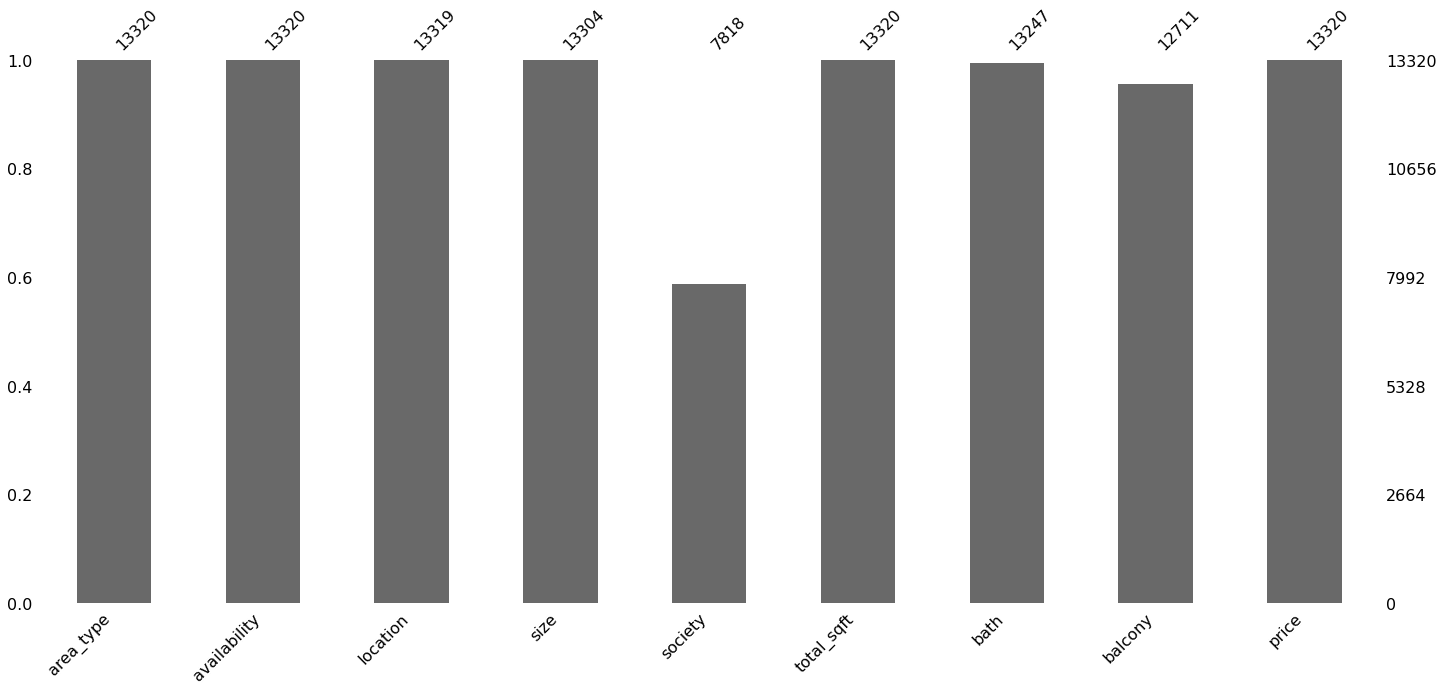

In [8]:
msno.bar(df)

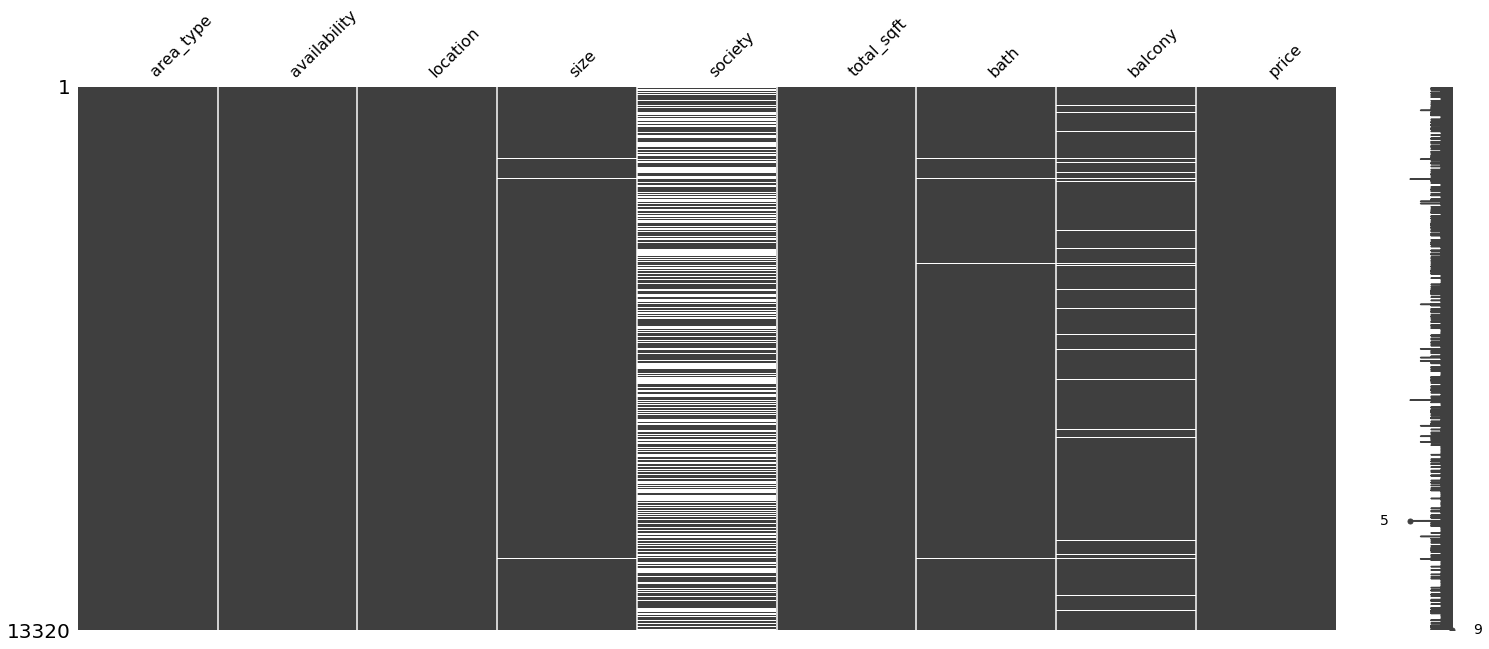

In [9]:
msno.matrix(df)

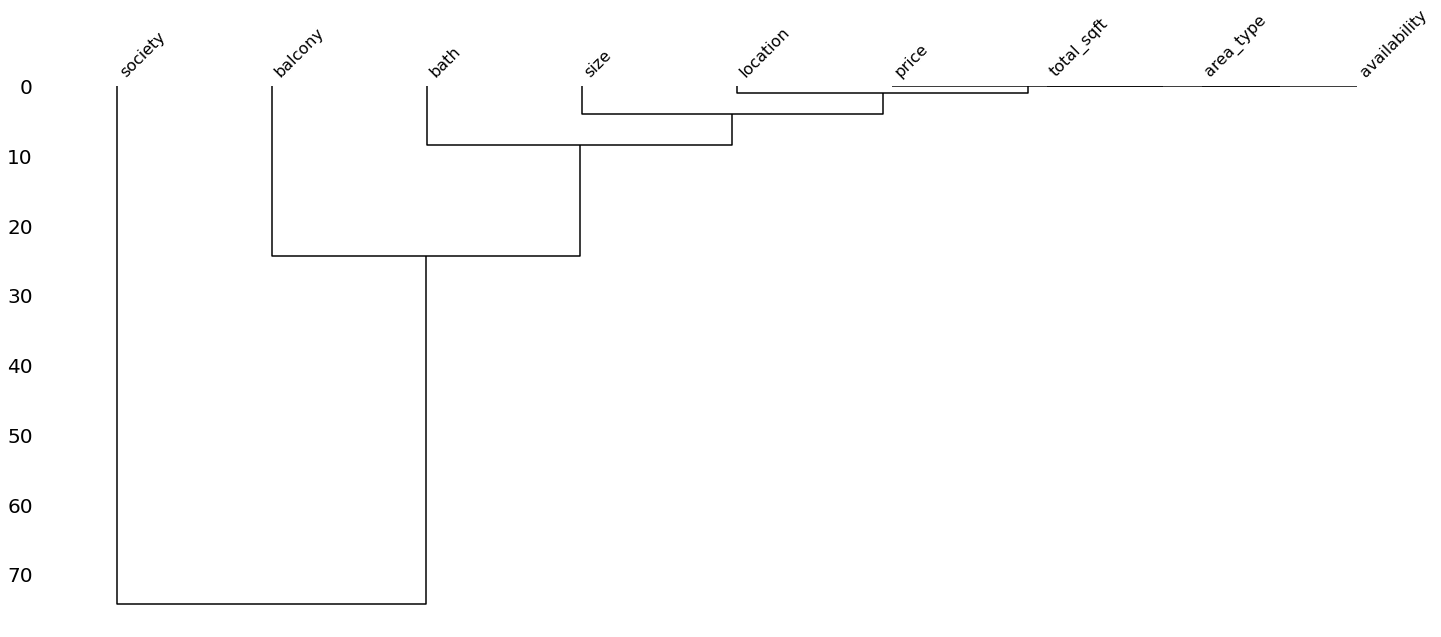

In [10]:
msno.dendrogram(df)

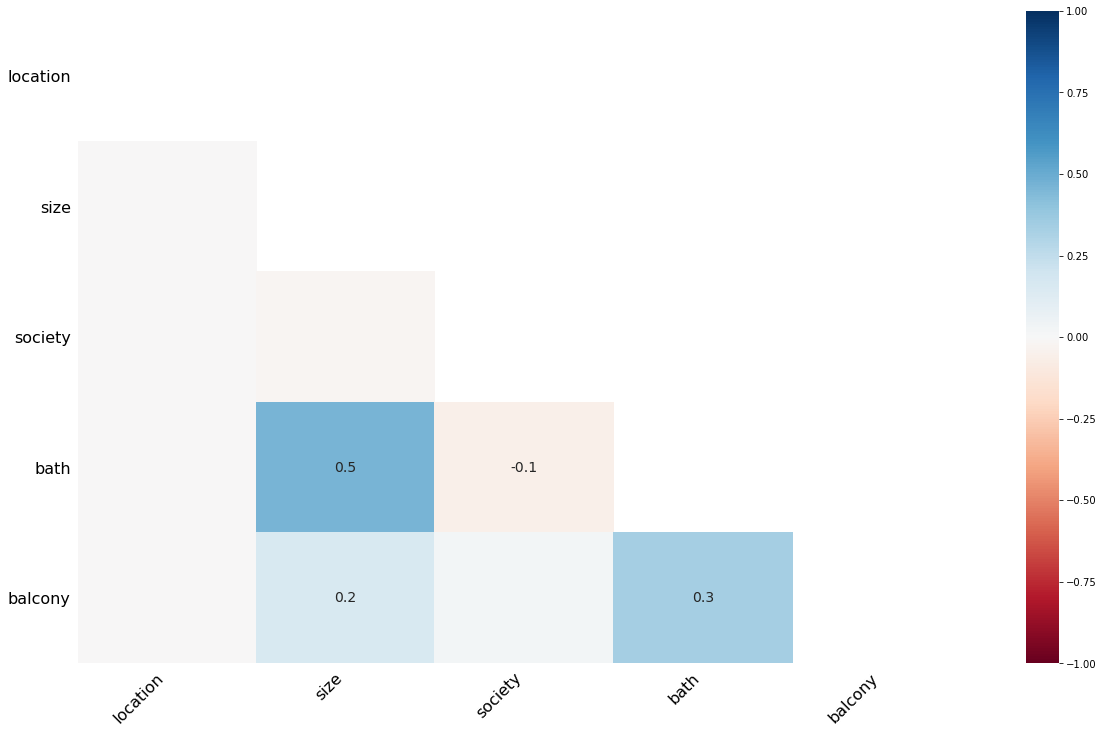

In [11]:
msno.heatmap(df)

In [12]:
df.columns.values

array(['area_type', 'availability', 'location', 'size', 'society',
       'total_sqft', 'bath', 'balcony', 'price'], dtype=object)

**Selecting useful columns according to my problem statement**

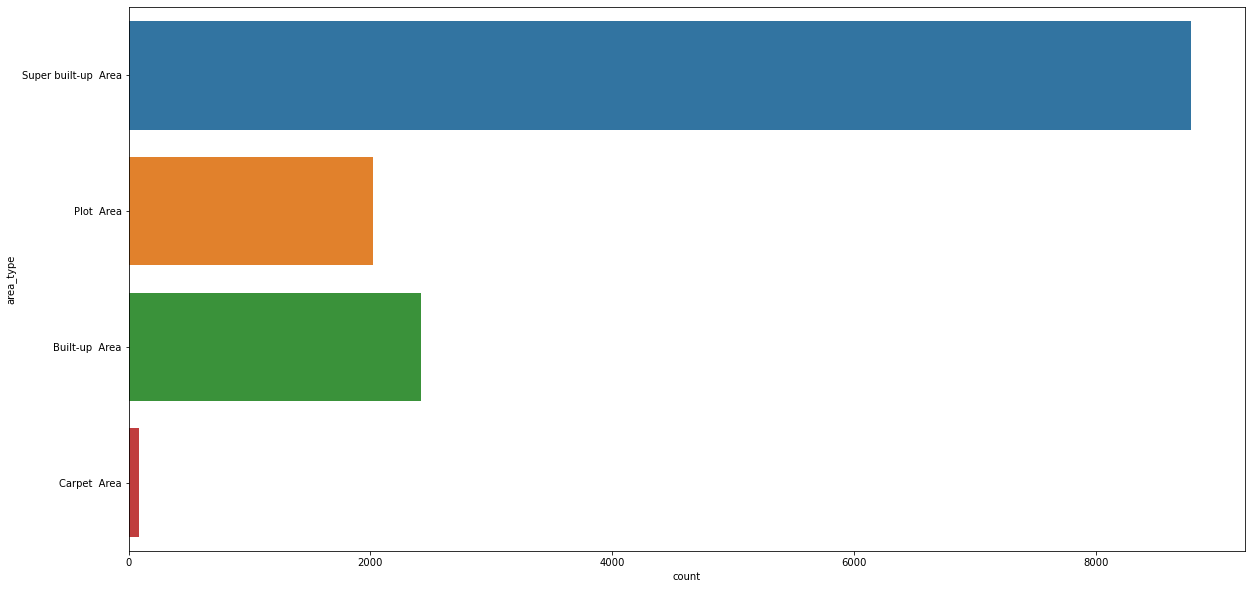

In [13]:
sns.countplot(
    data=df,
    y='area_type',
)

**area_type column can be used in later version for improving model.**

> **Useless Columns**
    1. Society 
    2. Area_type(Only in v1.0.0
    3. Availability

In [14]:
df.drop(['area_type', 'availability', 'society', 'balcony'], axis=1, inplace=True)

In [15]:
df.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


## Now we are on cleaning data part.

In [16]:
pd.DataFrame({
    'Count': df.isna().sum(),
    'Percentage': round((df.isna().sum()/len(df))*100,2)
})

,Count,Percentage
location,1,0.01
size,16,0.12
total_sqft,0,0.00
bath,73,0.55
price,0,0.00


In [17]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
bath,13247.0,2.692610,1.341458,1.0,2.0,2.0,3.0,40.0
price,13320.0,112.565627,148.971674,8.0,50.0,72.0,120.0,3600.0


In [18]:
df.describe(include='O').T

,count,unique,top,freq
location,13319,1305,Whitefield,540
size,13304,31,2 BHK,5199
total_sqft,13320,2117,1200,843


**Excluding location every columns should be a non object datatype.**

* We need to convert the size attribute from object to float datatype and rename it to BHK for better understanding.

In [19]:
# Let's drop the missing values in v1.0.0
df.dropna(inplace=True)

In [20]:
try:
    df['BHK']=df['size'].apply(lambda x: int(x.split(' ')[0]))
    df.drop('size', axis=1,inplace=True)
    df.head()
except Exception as e:
    print(e)

In [21]:
def isFloat(data):
    try:
        float(data)
    except:
        return False
    return True

In [22]:
df[~(df['total_sqft'].apply(isFloat))].sample(50)

,location,total_sqft,bath,price,BHK
4884,Electronic City Phase II,888 - 1290,2.0,32.670,2
1187,Thanisandra,850 - 1093,2.0,36.435,2
10488,2 Bedroom Furnished Farm House in Kolar Road,1.25Acres,2.0,200.000,2
7607,Bommenahalli,15Acres,3.0,217.000,3
4113,BTM Layout,167Sq. Meter,3.0,10.000,3
8087,Electronics City Phase 1,755 - 770,1.0,45.400,1
12990,Talaghattapura,1804 - 2273,3.0,122.000,3
9050,Bannerghatta Road,1365 - 1700,3.0,79.465,3
7797,Begur Road,2462 - 2467,6.0,118.000,4
11490,Sarjapur,2580 - 2591,4.0,115.000,4


In [23]:
# Need to fix the data.
def totalsqftFloat(data):
    '''This function will convert and fix the data from string to float datatype of only having `-` mark.'''
    x = data.split('-')
    if len(x)==2:
        return (float(x[0])+float(x[1]))/2
    try:
        return float(data)
    except:
        return None

In [24]:
df['total_sqft'] = df['total_sqft'].apply(totalsqftFloat)

In [25]:
df.isna().sum()

location       0
total_sqft    46
bath           0
price          0
BHK            0
dtype: int64

In [26]:
# Removing the NA values of total_sqft in v1.0.0 only
df.dropna(inplace=True)

## Feature engineering

**With using feature engineering technique on price column we will make a new column of price_per_sqft. Because for buying a house price_per_sqft is important one.**

In [27]:
df['price_per_sqft'] = (df['price']*1000000)/df['total_sqft']

In [28]:
df.head()

,location,total_sqft,bath,price,BHK,price_per_sqft
0,Electronic City Phase II,1056.0,2.0,39.07,2,36998.106061
1,Chikka Tirupathi,2600.0,5.0,120.00,4,46153.846154
2,Uttarahalli,1440.0,2.0,62.00,3,43055.555556
3,Lingadheeranahalli,1521.0,3.0,95.00,3,62458.908613
4,Kothanur,1200.0,2.0,51.00,2,42500.000000


In [29]:
df['price_per_sqft']=df['price_per_sqft'].apply(lambda x: round(x, 2))

In [30]:
df.head()

,location,total_sqft,bath,price,BHK,price_per_sqft
0,Electronic City Phase II,1056.0,2.0,39.07,2,36998.11
1,Chikka Tirupathi,2600.0,5.0,120.00,4,46153.85
2,Uttarahalli,1440.0,2.0,62.00,3,43055.56
3,Lingadheeranahalli,1521.0,3.0,95.00,3,62458.91
4,Kothanur,1200.0,2.0,51.00,2,42500.00


In [31]:
df['price_per_sqft'].describe().T

count    1.320000e+04
mean     7.920759e+04
std      1.067272e+06
min      2.678300e+03
25%      4.267701e+04
50%      5.438331e+04
75%      7.317073e+04
max      1.200000e+08
Name: price_per_sqft, dtype: float64

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13200 entries, 0 to 13319
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   location        13200 non-null  object 
 1   total_sqft      13200 non-null  float64
 2   bath            13200 non-null  float64
 3   price           13200 non-null  float64
 4   BHK             13200 non-null  int64  
 5   price_per_sqft  13200 non-null  float64
dtypes: float64(4), int64(1), object(1)
memory usage: 721.9+ KB


In [33]:
df['location'] = df['location'].apply(lambda x: x.strip())

In [34]:
df.head()

,location,total_sqft,bath,price,BHK,price_per_sqft
0,Electronic City Phase II,1056.0,2.0,39.07,2,36998.11
1,Chikka Tirupathi,2600.0,5.0,120.00,4,46153.85
2,Uttarahalli,1440.0,2.0,62.00,3,43055.56
3,Lingadheeranahalli,1521.0,3.0,95.00,3,62458.91
4,Kothanur,1200.0,2.0,51.00,2,42500.00


In [35]:
locationStats = df['location'].value_counts(ascending=False)
locationStats

Whitefield                   533
Sarjapur  Road               392
Electronic City              304
Kanakpura Road               264
Thanisandra                  235
                            ... 
1st Stage Domlur               1
Zuzuvadi                       1
2Electronic City Phase II      1
Sadahalli                      1
Hosahalli                      1
Name: location, Length: 1287, dtype: int64

In [36]:
locationStats.values.sum()

13200

In [37]:
len(locationStats[locationStats<10])

1033

In [38]:
len(locationStats[locationStats>10])

240

In [39]:
len(locationStats[locationStats>=10])

254

In [40]:
len(locationStats[locationStats<=10])

1047

In [41]:
# Location data of Counts less than equal to 10 will name into `other` name for ease in dimentionality reduction.
locationDimensions = locationStats[locationStats<=10]

In [42]:
df['location'] = df['location'].apply(lambda x: 'other' if x in locationDimensions else x)
len(df.location.unique())

241

In [43]:
df.sample(5)

,location,total_sqft,bath,price,BHK,price_per_sqft
4222,other,1200.0,2.0,125.0,2,104166.67
9987,Sarjapur Road,1314.0,2.0,110.0,2,83713.85
3158,HRBR Layout,2800.0,3.0,250.0,3,89285.71
2544,Whitefield,1870.0,3.0,90.0,3,48128.34
12018,Jalahalli East,1010.0,2.0,52.0,2,51485.15


**Now data is cleaned but not prepared fully for analysis.**

In [44]:
# Its time to check the outlier in the datasets.
df[df.total_sqft/df.BHK<300].head()

,location,total_sqft,bath,price,BHK,price_per_sqft
9,other,1020.0,6.0,370.0,6,362745.10
45,HSR Layout,600.0,9.0,200.0,8,333333.33
58,Murugeshpalya,1407.0,4.0,150.0,6,106609.81
68,Devarachikkanahalli,1350.0,7.0,85.0,8,62962.96
70,other,500.0,3.0,100.0,3,200000.00


**Normally we have 300 sqft for 1 BHK if anything smaller than that then it is suspicious.**

So anything less than that will be considered as an outlier and it can be removed.

In [45]:
df = df[~(df.total_sqft/df.BHK<300)]

In [46]:
df.head()

,location,total_sqft,bath,price,BHK,price_per_sqft
0,Electronic City Phase II,1056.0,2.0,39.07,2,36998.11
1,Chikka Tirupathi,2600.0,5.0,120.00,4,46153.85
2,Uttarahalli,1440.0,2.0,62.00,3,43055.56
3,Lingadheeranahalli,1521.0,3.0,95.00,3,62458.91
4,Kothanur,1200.0,2.0,51.00,2,42500.00


In [47]:
df.price_per_sqft.describe()

count    1.245600e+04
mean     6.308503e+04
std      4.168127e+04
min      2.678300e+03
25%      4.210526e+04
50%      5.294118e+04
75%      6.916667e+04
max      1.764706e+06
Name: price_per_sqft, dtype: float64

So the minimum price we are getting now is ₹ 267 and ₹ 1800000 is the highest for price per sqft.

**We should remove outliers per location using mean and one standard deviation**

In [48]:
# fucntion for removing price_per_sqft outliers
def remove_pps_outliers(data):
    df_out=pd.DataFrame()
    for key, sub_df in df.groupby('location'):
        m = np.mean(sub_df.price_per_sqft)
        std = np.std(sub_df.price_per_sqft)
        # every datapoints within the range of greater than and less than (m-std) will be in new dataframe
        reduced_df = sub_df[(sub_df.price_per_sqft>(m-std)) & (sub_df.price_per_sqft<=(m+std))]
        df_out = pd.concat([df_out, reduced_df], ignore_index=True)
    return df_out

In [49]:
print(df.shape)

(12456, 6)


In [50]:
df = remove_pps_outliers(df)
print(df.shape)

(10242, 6)


In [51]:
df.head()

,location,total_sqft,bath,price,BHK,price_per_sqft
0,1st Block Jayanagar,2850.0,4.0,428.0,4,150175.44
1,1st Block Jayanagar,1630.0,3.0,194.0,3,119018.40
2,1st Block Jayanagar,1875.0,2.0,235.0,3,125333.33
3,1st Block Jayanagar,1200.0,2.0,130.0,3,108333.33
4,1st Block Jayanagar,1235.0,2.0,148.0,2,119838.06


In [52]:
def plot_scatter_chart(df,location):
    bhk2 = df[(df.location==location) & (df.BHK==2)]
    bhk3 = df[(df.location==location) & (df.BHK==3)]
    plt.scatter(bhk2.total_sqft,bhk2.price,color='blue',label='2 BHK', s=50)
    plt.scatter(bhk3.total_sqft,bhk3.price,marker='+', color='green',label='3 BHK', s=50)
    plt.xlabel("Total Square Feet Area")
    plt.ylabel("Price (Lakh Indian Rupees)")
    plt.title(location)
    plt.legend()

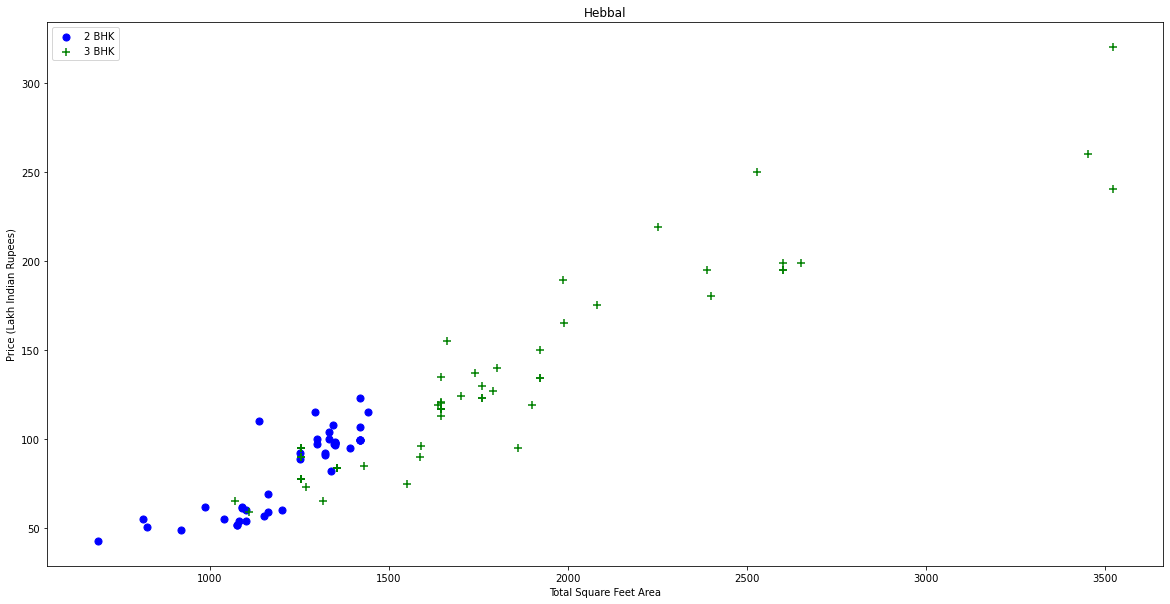

In [53]:
plot_scatter_chart(df=df, location='Hebbal')

In [54]:
def remove_bhk_outliers(df):
    exclude_indices = np.array([])
    for location, location_df in df.groupby('location'):
        bhk_stats = {}
        for bhk, bhk_df in location_df.groupby('BHK'):
            bhk_stats[bhk] = {
                'mean': np.mean(bhk_df.price_per_sqft),
                'std': np.std(bhk_df.price_per_sqft),
                'count': bhk_df.shape[0]
            }
        for bhk, bhk_df in location_df.groupby('BHK'):
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.price_per_sqft<(stats['mean'])].index.values)
    return df.drop(exclude_indices,axis='index')

In [55]:
print(df.shape)

(10242, 6)


In [56]:
df = remove_bhk_outliers(df)
print(df.shape)

(7317, 6)


In [57]:
df.head()

,location,total_sqft,bath,price,BHK,price_per_sqft
0,1st Block Jayanagar,2850.0,4.0,428.0,4,150175.44
1,1st Block Jayanagar,1630.0,3.0,194.0,3,119018.40
2,1st Block Jayanagar,1875.0,2.0,235.0,3,125333.33
3,1st Block Jayanagar,1200.0,2.0,130.0,3,108333.33
4,1st Block Jayanagar,1235.0,2.0,148.0,2,119838.06


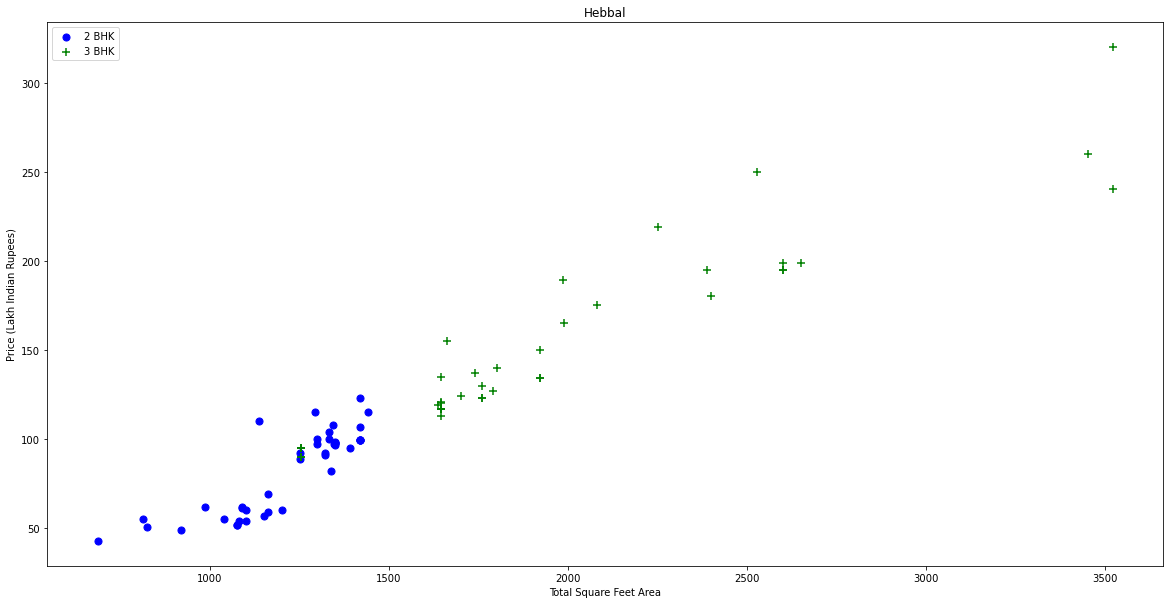

In [58]:
plot_scatter_chart(df, location='Hebbal')

Text(0, 0.5, 'Count')

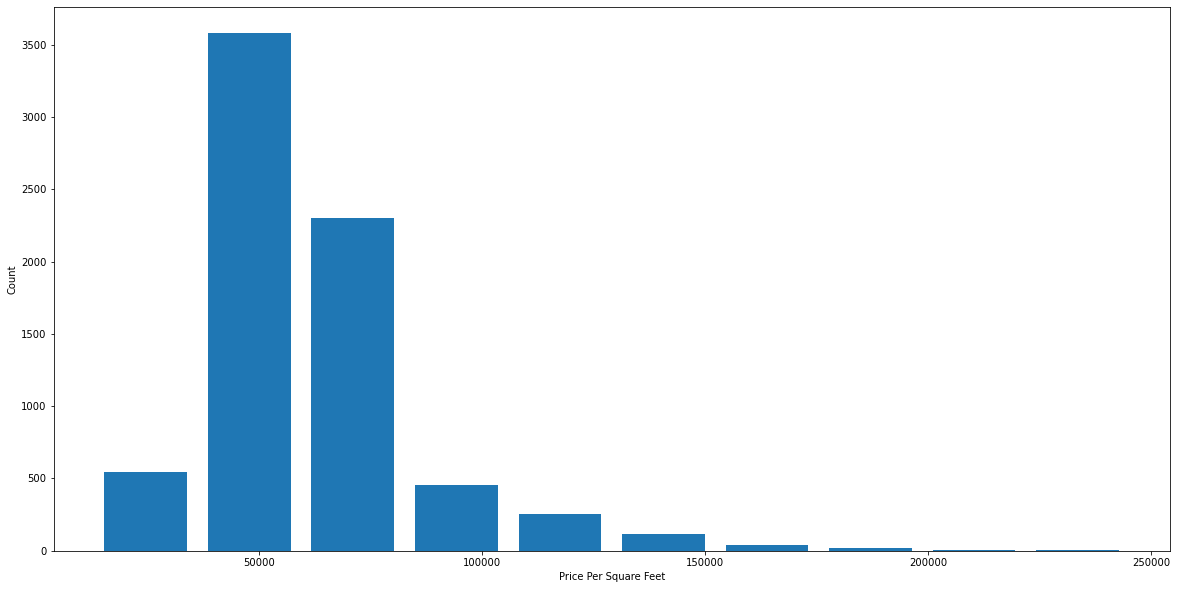

In [59]:
plt.hist(df.price_per_sqft,rwidth=0.8)
plt.xlabel("Price Per Square Feet")
plt.ylabel("Count")

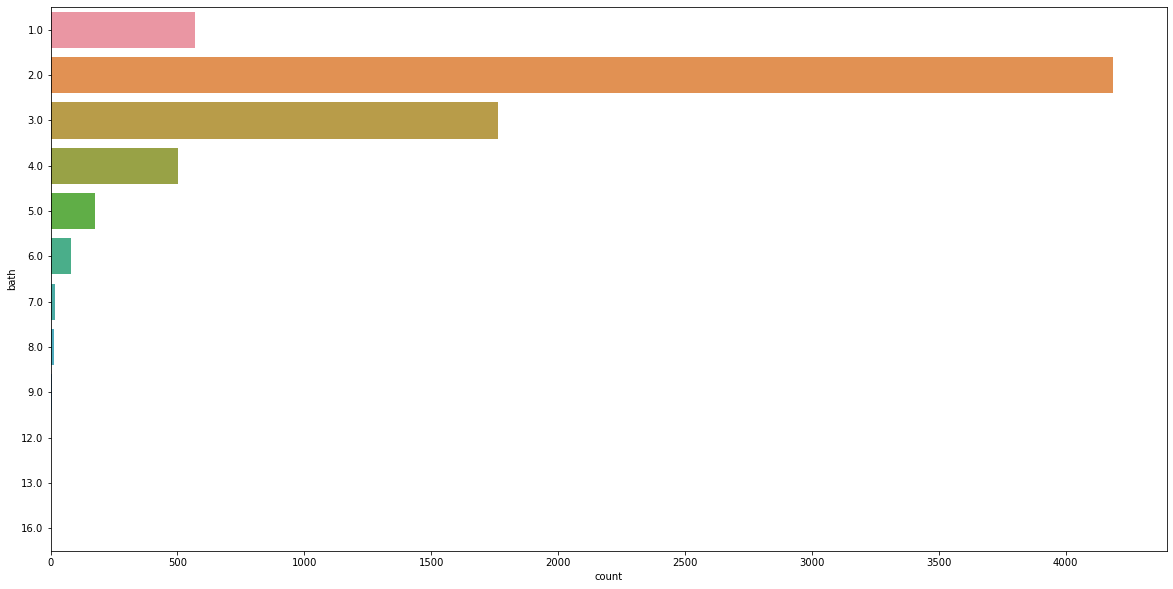

In [60]:
sns.countplot(
    data=df,
    y='bath'
)

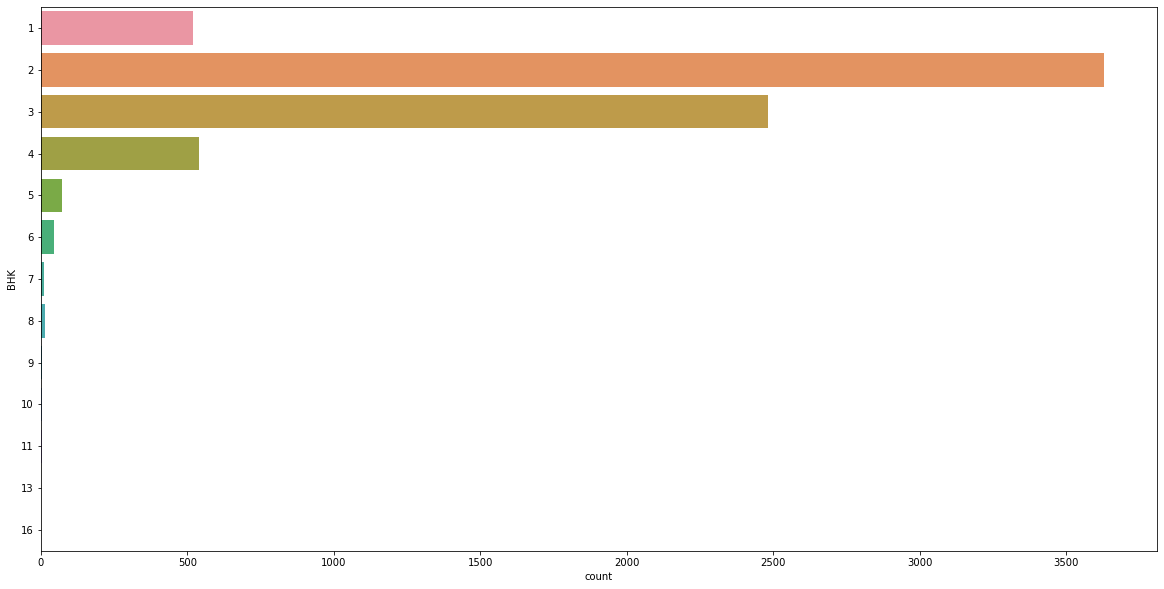

In [61]:
sns.countplot(
    data=df,
    y='BHK',
)

In [62]:
df[df.bath>df.BHK+2]

,location,total_sqft,bath,price,BHK,price_per_sqft
1626,Chikkabanavar,2460.0,7.0,80.0,4,32520.33
5238,Nagasandra,7000.0,8.0,450.0,4,64285.71
6711,Thanisandra,1806.0,6.0,116.0,3,64230.34
8408,other,11338.0,9.0,1000.0,6,88198.98


**It is unusual to have more than two bathrooms than no of bedrooms.**

In [63]:
print(df.shape)
df = df[~(df.bath>df.BHK+2)]
print(df.shape)

(7317, 6)
(7313, 6)


In [64]:
df.drop(['price_per_sqft'], axis=1, inplace=True)
df.head()

,location,total_sqft,bath,price,BHK
0,1st Block Jayanagar,2850.0,4.0,428.0,4
1,1st Block Jayanagar,1630.0,3.0,194.0,3
2,1st Block Jayanagar,1875.0,2.0,235.0,3
3,1st Block Jayanagar,1200.0,2.0,130.0,3
4,1st Block Jayanagar,1235.0,2.0,148.0,2


In [65]:
dummies = pd.get_dummies(df.location)
dummies

,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,AECS Layout,Abbigere,Akshaya Nagar,Ambalipura,Ambedkar Nagar,Amruthahalli,Anandapura,Ananth Nagar,Anekal,Anjanapura,Ardendale,Arekere,Attibele,BEML Layout,BTM 2nd Stage,BTM Layout,Babusapalaya,Badavala Nagar,Balagere,Banashankari,Banashankari Stage II,Banashankari Stage III,Banashankari Stage V,Banashankari Stage VI,Banaswadi,Banjara Layout,Bannerghatta,Bannerghatta Road,Basavangudi,Basaveshwara Nagar,Battarahalli,Begur,Begur Road,Bellandur,Benson Town,Bharathi Nagar,Bhoganhalli,Billekahalli,Binny Pete,Bisuvanahalli,...,Prithvi Layout,R.T. Nagar,Rachenahalli,Raja Rajeshwari Nagar,Rajaji Nagar,Rajiv Nagar,Ramagondanahalli,Ramamurthy Nagar,Rayasandra,Sahakara Nagar,Sanjay nagar,Sarakki Nagar,Sarjapur,Sarjapur Road,Sarjapura - Attibele Road,Sector 2 HSR Layout,Sector 7 HSR Layout,Seegehalli,Shampura,Shivaji Nagar,Singasandra,Somasundara Palya,Sompura,Sonnenahalli,Subramanyapura,Sultan Palaya,TC Palaya,Talaghattapura,Thanisandra,Thigalarapalya,Thubarahalli,Tindlu,Tumkur Road,Ulsoor,Uttarahalli,Varthur,Varthur Road,Vasanthapura,Vidyaranyapura,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10233,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
10234,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
10237,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
10238,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


**For escaping from dummy variable trap. lets remove the last column.**

In [66]:
df = pd.concat(
    [
        df.drop('location', axis=1), dummies.drop(['other'], axis='columns')
    ], axis=1
)

In [67]:
df.head()

,total_sqft,bath,price,BHK,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,AECS Layout,Abbigere,Akshaya Nagar,Ambalipura,Ambedkar Nagar,Amruthahalli,Anandapura,Ananth Nagar,Anekal,Anjanapura,Ardendale,Arekere,Attibele,BEML Layout,BTM 2nd Stage,BTM Layout,Babusapalaya,Badavala Nagar,Balagere,Banashankari,Banashankari Stage II,Banashankari Stage III,Banashankari Stage V,Banashankari Stage VI,Banaswadi,Banjara Layout,Bannerghatta,Bannerghatta Road,Basavangudi,Basaveshwara Nagar,Battarahalli,Begur,Begur Road,Bellandur,Benson Town,Bharathi Nagar,...,Poorna Pragna Layout,Prithvi Layout,R.T. Nagar,Rachenahalli,Raja Rajeshwari Nagar,Rajaji Nagar,Rajiv Nagar,Ramagondanahalli,Ramamurthy Nagar,Rayasandra,Sahakara Nagar,Sanjay nagar,Sarakki Nagar,Sarjapur,Sarjapur Road,Sarjapura - Attibele Road,Sector 2 HSR Layout,Sector 7 HSR Layout,Seegehalli,Shampura,Shivaji Nagar,Singasandra,Somasundara Palya,Sompura,Sonnenahalli,Subramanyapura,Sultan Palaya,TC Palaya,Talaghattapura,Thanisandra,Thigalarapalya,Thubarahalli,Tindlu,Tumkur Road,Ulsoor,Uttarahalli,Varthur,Varthur Road,Vasanthapura,Vidyaranyapura,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,428.0,4,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,194.0,3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1875.0,2.0,235.0,3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1200.0,2.0,130.0,3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1235.0,2.0,148.0,2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


# Our target is price prediction

In [68]:
X = df.drop('price',axis=1)
Y = df.price

In [69]:
X.head()

,total_sqft,bath,BHK,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,AECS Layout,Abbigere,Akshaya Nagar,Ambalipura,Ambedkar Nagar,Amruthahalli,Anandapura,Ananth Nagar,Anekal,Anjanapura,Ardendale,Arekere,Attibele,BEML Layout,BTM 2nd Stage,BTM Layout,Babusapalaya,Badavala Nagar,Balagere,Banashankari,Banashankari Stage II,Banashankari Stage III,Banashankari Stage V,Banashankari Stage VI,Banaswadi,Banjara Layout,Bannerghatta,Bannerghatta Road,Basavangudi,Basaveshwara Nagar,Battarahalli,Begur,Begur Road,Bellandur,Benson Town,Bharathi Nagar,Bhoganhalli,...,Poorna Pragna Layout,Prithvi Layout,R.T. Nagar,Rachenahalli,Raja Rajeshwari Nagar,Rajaji Nagar,Rajiv Nagar,Ramagondanahalli,Ramamurthy Nagar,Rayasandra,Sahakara Nagar,Sanjay nagar,Sarakki Nagar,Sarjapur,Sarjapur Road,Sarjapura - Attibele Road,Sector 2 HSR Layout,Sector 7 HSR Layout,Seegehalli,Shampura,Shivaji Nagar,Singasandra,Somasundara Palya,Sompura,Sonnenahalli,Subramanyapura,Sultan Palaya,TC Palaya,Talaghattapura,Thanisandra,Thigalarapalya,Thubarahalli,Tindlu,Tumkur Road,Ulsoor,Uttarahalli,Varthur,Varthur Road,Vasanthapura,Vidyaranyapura,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,4,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1875.0,2.0,3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1200.0,2.0,3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1235.0,2.0,2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [70]:
df.to_csv('./prepared_data.csv', index=False)

# Now Model building part

In [71]:
from sklearn.model_selection import train_test_split, ShuffleSplit, cross_val_score, GridSearchCV

In [72]:
from sklearn.linear_model import Lasso, LinearRegression
from sklearn.tree import DecisionTreeRegressor

def find_best_model_using_gridsearchcv(X,y):
    algos = {
        'linear_regression' : {
            'model': LinearRegression(),
            'params': {
                'normalize': [True, False]
            }
        },
        'lasso': {
            'model': Lasso(),
            'params': {
                'alpha': [1,2],
                'selection': ['random', 'cyclic']
            }
        },
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion' : ['mse','friedman_mse'],
                'splitter': ['best','random']
            }
        }
    }
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    for algo_name, config in algos.items():
        gs =  GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(X,y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })

    return pd.DataFrame(scores,columns=['model','best_score','best_params'])

find_best_model_using_gridsearchcv(X,Y)

,model,best_score,best_params
0,linear_regression,0.849768,{'normalize': False}
1,lasso,0.701200,"{'alpha': 1, 'selection': 'cyclic'}"
2,decision_tree,0.725491,"{'criterion': 'friedman_mse', 'splitter': 'ran..."


In [73]:
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.2,random_state=10)

from sklearn.linear_model import LinearRegression
lr_clf = LinearRegression(normalize=False)
lr_clf.fit(X_train,y_train)
lr_clf.score(X_test,y_test)

0.8100855727729317

In [74]:
def predict_price(location,sqft,bath,bhk):    
    loc_index = np.where(X.columns==location)[0][0]

    x = np.zeros(len(X.columns))
    x[0] = sqft
    x[1] = bath
    x[2] = bhk
    if loc_index >= 0:
        x[loc_index] = 1
    print([x])
    return lr_clf.predict([x])[0]

In [75]:
predict_price('1st Phase JP Nagar',1000, 2, 2)

[array([1000.,    2.,    2.,    0.,    1.,    0.,    0.,    0.,    0.,
          0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
          0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
          0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
          0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
          0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
          0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
          0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
          0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
          0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
          0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
          0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
          0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
          0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
          0.,    0.

83.71794810952572

In [76]:
cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

cross_val_score(LinearRegression(), X, Y, cv=cv)

array([0.86801733, 0.84558034, 0.83182627, 0.83917255, 0.86424179])

In [77]:
import pickle
with open('banglore_home_prices_model.pickle','wb') as f:
    pickle.dump(lr_clf,f)

In [78]:
import json
columns = {
    'data_columns' : [col.lower() for col in X.columns]
}
with open("columns.json","w") as f:
    f.write(json.dumps(columns))